# Aula 01 - Séries Temporais

# Definições e Fundamentos

### Material original: Prof. Dr. Eduardo Lobo Lustosa Cabral
### Atualizado por: Prof. Dr. Vitor Alex Oliveira Alves

## 1. Objetivos
Os objetivos dessa aula são apresentar:

*   A definição de Série Temporal;
*   As principais características e comportamentos comuns das séries temporais;
*   Alguns exemplos de séries temporais;
*   O conceito de autocorrelação de uma série temporal.




## 2. Definição

Uma série temporal pode ser definida como sendo uma sequência de dados indexados em ordem de tempo. 


Mais comumente, uma série temporal é uma sequência de dados adquiridos em sucessivos instantes igualmente espaçados no tempo. 


Uma série temporal consiste de uma sequência de dados em tempo discreto.


Alguns exemplos de séries temporais:

   - Alturas de marés oceânicas;
   - Contagens de manchas solares;
   - Valor de fechamento diário do índice da bolsa de valores;
   - Temperatura diária.


Em uma série temporal, os dados são organizados por carimbos de data/hora relativamente determinísticos e podem, em comparação com dados de amostras aleatórios, conter informações que podem ser extraidas.

## Importação das principais bibliotecas 

Vamos importar algumas bibliotecas principais. 



In [2]:
import numpy as np                # Vetores e Matrizes
import pandas as pd               # Processamento de dados em forma de tabelas
import matplotlib.pyplot as plt   # Gráficos
import seaborn as sns             # Mais gráficos
import tensorflow as tf
import os

%matplotlib inline

## 3. Características e comportamentos

As séries temporais apresentam algumas características comuns. Além disso, apresentam também alguns comportamentos que estão presentes em muitas séries.

As principais características de um série temporal são:

1. Período/frequência de amostragem;
2. Tipo de dados.

Existem 3 padrões principais que podem estar presentes nas séries temporais:

1. Tendência;
2. Sazonalidade;
3. Ciclos;
4. Ruido.

A forma mais fácil de inciar a análise de uma série temporal é por meio de gráficos:

- Os gráficos permitem que muitas caracterísitcas dos dados sejam visualizados, incluindo padrões, observações incomuns, mudanças ao longo do tempo e relações entre variáveis. 

- As características vistas nos gráficos dos dados devem ser incorporadas, tanto quanto possível, aos métodos de análise/previsão usados. 

- Assim como os dados determinam qual método de análise/previsão usar, eles também determinam quais gráficos são apropriados.

### 3.1 Período/frequência de amostragem

Período de amostragem é o intervalo de tempo entre duas amostras consecutivas 

   - Em praticamente todas as séries temporais se usa um período de amostragem uniforme, ou seja, constante.

   - O período de amostragem pode, em alguns casos, ser somente uma contagem do número de amostras sem definição de tempo.


Frequência de amostragem é o inverso do tempo de amostragem $\rightarrow$ é utilizada quando se quer analisar o conteúdo de frequências de uma série.

   $$f_a = \frac {1}{T_a}$$

  onde $f_a$ é a frequência de amostragem e $T_a$ é o período de amostragem.
  
  
Na figura abaixo é mostrada a escala de tempo discreto com período de amsotragem $T_a$.




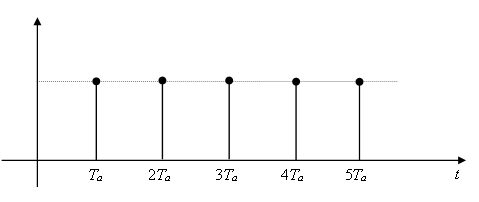

### 3.2 Séries periódicas

Algumas séries temporais são periódicas, ou seja, se repetem a intervalos de tempo fixos chamado de período da série.


Frequência fundamental de uma série temporal $\rightarrow$ é igual ao inverso do período da série 


Matematicamente uma série periódica é definida por:
    
 $$f(t) = f(t+T)$$

 onde $T$ é o período da série.


Na medida em que uma série periódica se repete, analisar e realizar previsões nesse tipo de série é trivial e não necessita de métodos de IA.


O gráfico abaixo mostra um exemplo de série periódica com duas componentes de frequência:

1. frequência de $\pi/9$ rad/s (período de 18 segundos);
2. frequência de $\pi/3$ rad/s (período de 6 segundos). 

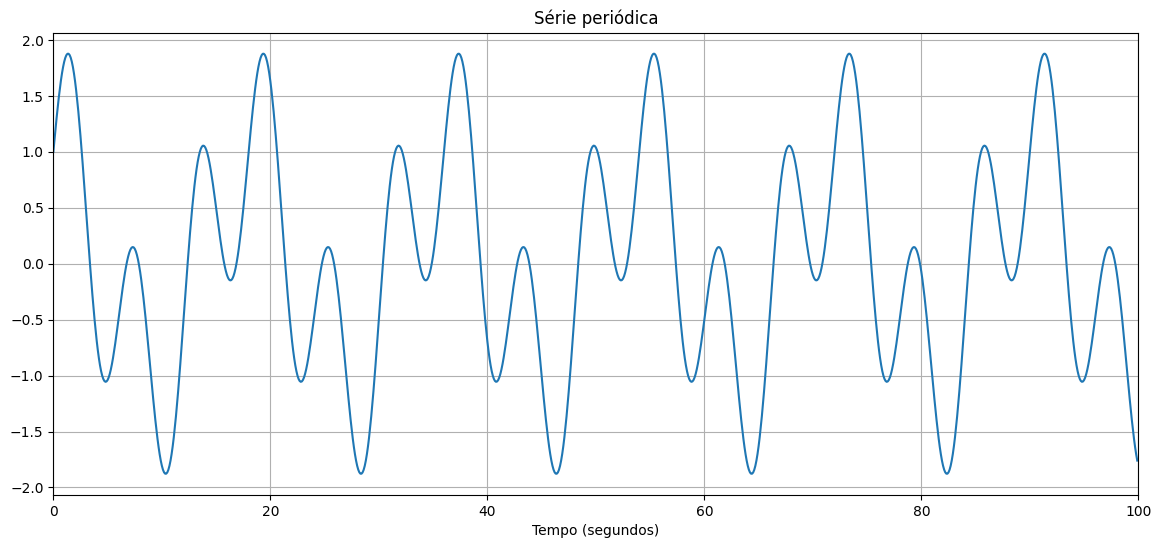

In [3]:
# Importa biblioteca de funções matemáticas 
import math

# Define valor de pi
pi = math.pi
# Cria vetor e tempo
t = np.arange(0.0, 100.0, 0.1)
# Cria série periódica
y = np.sin(pi*t/3) + np.cos(pi*t/9)

plt.figure(figsize=(14, 6))
plt.plot(t, y)
plt.xlim((0, 100))
plt.title('Série periódica')
plt.xlabel('Tempo (segundos)')
plt.grid(True)
plt.show()

### 3.3 Sazonalidade

Na maioria dos casos a série não é de fato periódica, mas podemos identificar um período ou mais períodos no qual um padrão se repete $\rightarrow$ nesse caso dizemos que a série apresenta uma sazonalidade.


Em geral um padrão se repete quando a série temporal está sujeita a fatores que variam em função da época do ano, do dia da semana, ou da hora do dia.


Exemplos de peíodos de sazonalidade:
   - Anual
   - Trimestral
   - Mensal
   - Semanal 
   - horária
   - etc 
    

A sazonalidade sempre ocorre com uma frequência fixa e conhecida. Por exemplo, vendas de casacos aumenta na época do inverno e diminui no verão.


Nota-se que uma série pode ter mais de uma sazonalidade, ou seja, pode, por exemplo, se repetir a cada dia e também a cada semana. 


Uma forma de obter o conteúdo de frequência de uma série é a calcular a sua Transformada de Fourier.


### Exemplos

Como exemplos de séries temporais que apresentam sazonalidade vamos usar dados de um desenvolvedor de "video game" para celular (https://www.kaggle.com/code/shubham2306/ads-currency/data?select=ads.csv e https://www.kaggle.com/code/shubham2306/ads-currency/data?select=currency.csv).

Mais especificamente analisaremos os anúncios assistidos por hora e a receita de vendas do jogo por dia.

#### Número de anúncios visualizados

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
ads = pd.read_csv('/content/drive/MyDrive/Datasets/ads.csv',
                  index_col=['Time'], parse_dates=['Time'])
currency = pd.read_csv('/content/drive/MyDrive/Datasets/currency.csv',
                       index_col=['Time'], parse_dates=['Time'])
display(ads.head())

,Ads
Time,
2017-09-13 00:00:00,80115
2017-09-13 01:00:00,79885
2017-09-13 02:00:00,89325
2017-09-13 03:00:00,101930
2017-09-13 04:00:00,121630


Observe que os dados dessa série são coletados a cada hora durante 24 horas por dia todos os dias da semana $\rightarrow$ nessse caso $T_a = 1$ hora

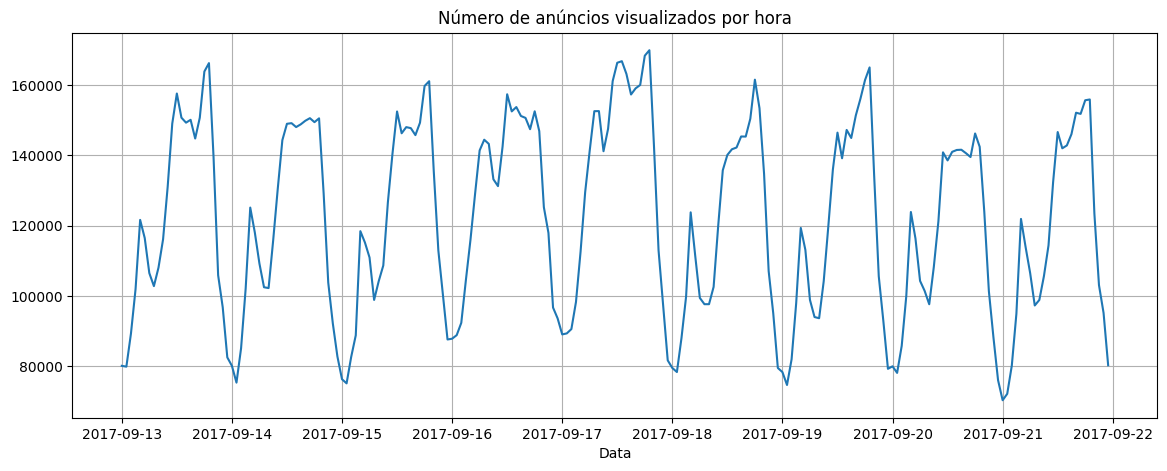

In [8]:
plt.figure(figsize=(14, 5))
plt.plot(ads.Ads)
plt.title('Número de anúncios visualizados por hora')
plt.xlabel('Data')
plt.grid(True)
plt.show()

- É facil de observar que essa série apresenta uma sazonalidade de 1 dia.


#### Receita de vendas

In [9]:
display(currency.head())

,GEMS_GEMS_SPENT
Time,
2017-05-01,1199436
2017-05-02,1045515
2017-05-03,586111
2017-05-04,856601
2017-05-05,793775


 - Observe que os dados dessa série são coletados uma vez por dia todos os dias da semana $\rightarrow$ nessse caso $T = 1$ dia.


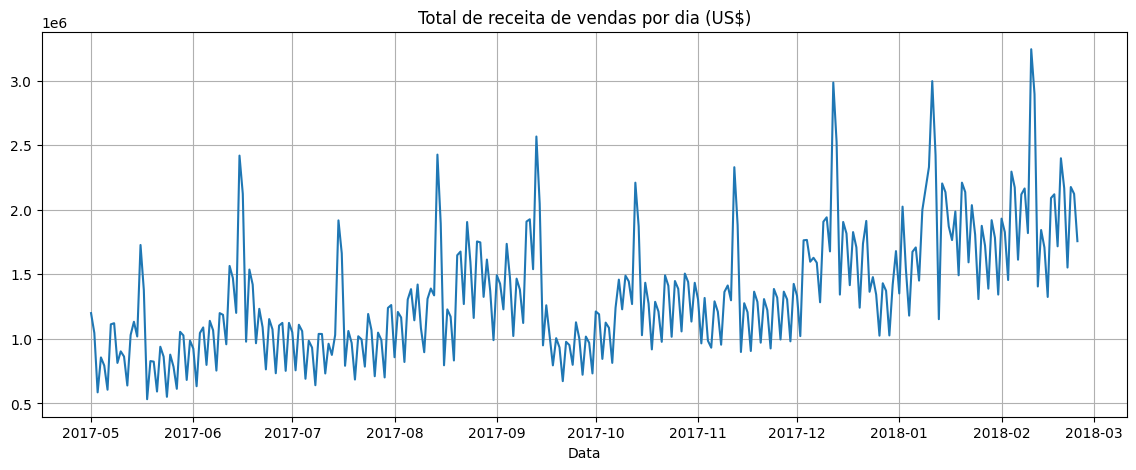

In [10]:
plt.figure(figsize=(14, 5))
plt.plot(currency.GEMS_GEMS_SPENT)
plt.title('Total de receita de vendas por dia (US$)')
plt.xlabel('Data')
plt.grid(True)
plt.show()

- É facil de observar que essa série apresenta uma sazonalidade de cerca de 1 mês.

### 3.4 Tendência

Uma série apresenta uma tendência quando existe um aumento ou diminuição gradual nos dados.


Esse aumento ou diminuição não precisa ser linear.


A série da receita de vendas apresenta uma tendência de cescimento, conforme pode ser visto na figura abaixo. Assume-se que essa tendência segue um polinômio de 2a ordem em função do tempo.

In [16]:
# Vetor de tempo
t = np.reshape(np.arange(0, 300), (300,1))
# Vetor de instantes de tempo ao quadrado
t2 = t**2
# Matriz de tempo
A = np.concatenate((t2, t, np.ones((300,1))), axis=1)
# Calculo da pseudo inversa
Ai = np.linalg.pinv(A)
# Cálculo dos coeficientes do polinômio
c = np.dot(Ai, currency)
# Cálculo da tendência ao longo do tempo
trend = c[0,0]*t2 + c[1,0]*t + c[2,0]
vendas = currency
vendas['tendencia'] = trend
vendas.head()

,GEMS_GEMS_SPENT,tendencia
Time,,
2017-05-01,1199436,1.004436e+06
2017-05-02,1045515,1.004671e+06
2017-05-03,586111,1.004927e+06
2017-05-04,856601,1.005204e+06
2017-05-05,793775,1.005501e+06


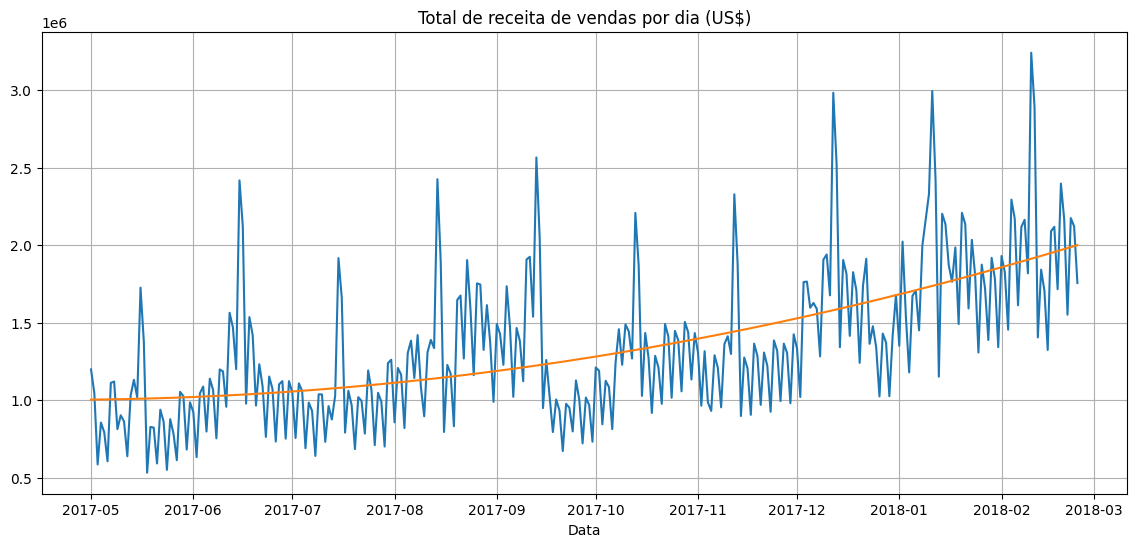

In [17]:
plt.figure(figsize=(14, 6))
plt.plot(vendas)
plt.title('Total de receita de vendas por dia (US$)')
plt.xlabel('Data')
plt.grid(True)
plt.show()

### 3.5 Ciclos

Um ciclo ocorre em uma série temporal quando ela exibe aumentos e diminuições que não ocorrem com frequência fixa. 


Esses ciclos em geral ocorrem em razão de condições econômicas e sua duração pode ser variável. 


É muito fácil confundir comportamento de ciclo com sazonalidade, porém são duas coisas diferentes:

   - Se a flutuação não tiver um frequência fixa, então, é um ciclo;
   - Se a frequência for fixa e estiver associada ao "calendário/horário", então, é uma sazonalidade
    

Em geral a duração de um ciclo é maior do que de uma sazonalidade e as magnitudes dos ciclos tendem a ser mais variáveis do que das sazonalidades. 


Na figura abaixo é mostrado uma série da taxa de desemprego nos EUA, onde se observa claramente os vários ciclos (https://www.kaggle.com/datasets/axeltorbenson/unemployment-data-19482021?resource=download).

In [18]:
emprego = pd.read_csv('/content/drive/MyDrive/Datasets/unemployment_rate_data.csv',
                      index_col=['date'], parse_dates=['date'])
emprego.head()

,unrate,unrate_men,unrate_women,unrate_16_to_17,unrate_18_to_19,unrate_20_to_24,unrate_25_to_34,unrate_35_to_44,unrate_45_to_54,unrate_55_over
date,,,,,,,,,,
1948-01-01,4.0,4.2,3.5,10.8,9.6,6.6,3.6,2.6,2.7,3.6
1948-02-01,4.7,4.7,4.8,15.0,9.5,8.0,4.0,3.2,3.4,4.0
1948-03-01,4.5,4.5,4.4,13.2,9.3,8.6,3.5,3.2,2.9,3.5
1948-04-01,4.0,4.0,4.1,9.9,8.1,6.8,3.5,3.1,2.9,3.2
1948-05-01,3.4,3.3,3.4,6.4,7.2,6.3,2.8,2.5,2.3,2.9


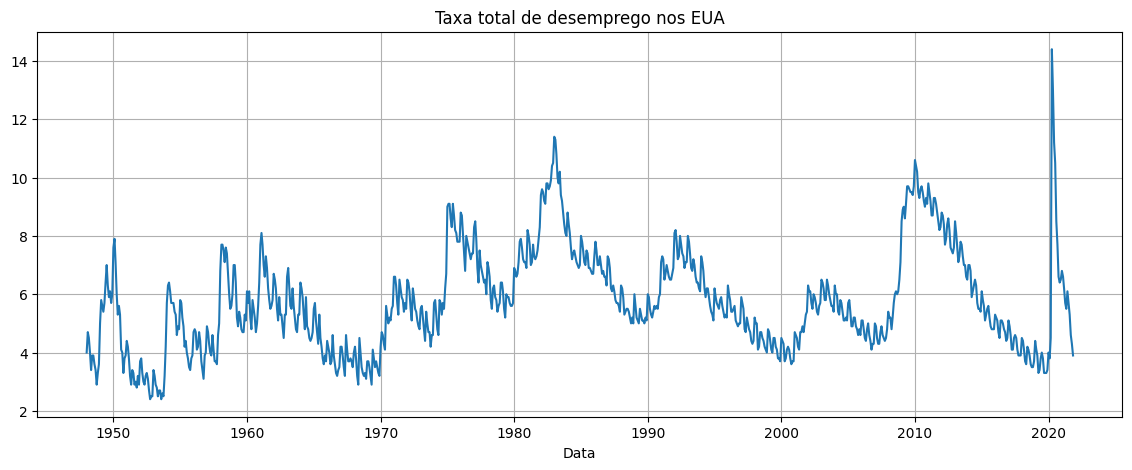

In [19]:
plt.figure(figsize=(14, 5))
plt.plot(emprego.unrate)
plt.title('Taxa total de desemprego nos EUA')
plt.xlabel('Data')
plt.grid(True)
plt.show()

### 3.6 Ruído

Uma caracteística muito comum, que está presente em praticamente todas as séries temporais é ruído.


Ruído está presente principalmente quando os dados são adquiridos de sensores usados para medir alguma grandeza física.


Podemos classificar os ruídos em duas classes:

1. Ruído branco;
2. Ruído colorido.


### Ruído branco

Um ruído branco é definido como sendo uma variável totalmente aleatória, que não possui nenhuma correlação com seus valores passados.

Assume-se que um ruído branco possui distribuição de probabilidade gaussina (normal) com média zero e desvio padrão igual a um.

O ruído branco é uma série estacionária, porque possui a mesma média e mesmo desvio padrão em qualquer intervalo de tempo considerado. 

A figura abaixo mostra um ruído branco.

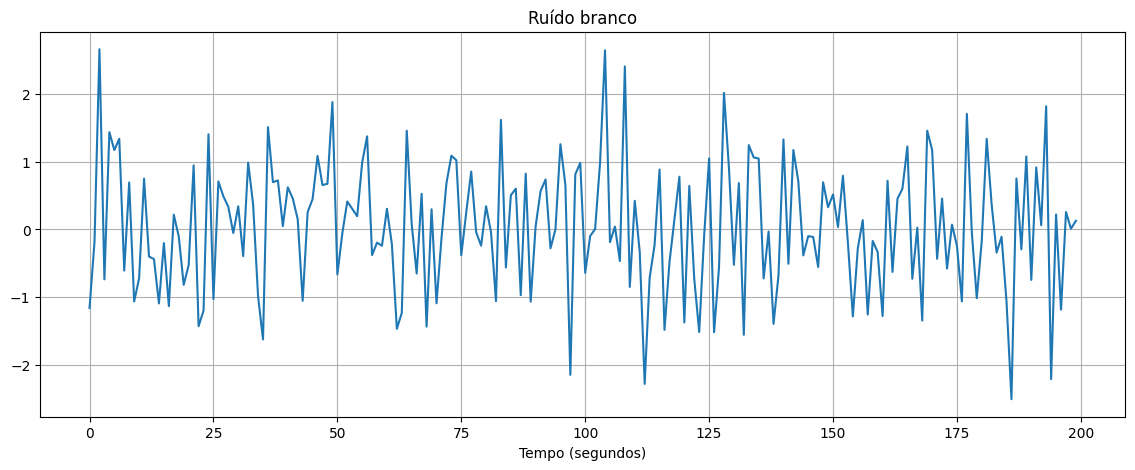

In [21]:
# Gera ruído branco
ruido_branco = np.random.normal(loc=0.0, scale=1.0, size=(200,1))

plt.figure(figsize=(14, 5))
plt.plot(ruido_branco)
plt.title('Ruído branco')
plt.xlabel('Tempo (segundos)')
plt.grid(True)
plt.show()

Um exemplo de uma série com ruído, pode ser vista na figura abaixo onde se adicionou um ruído de média zero e desvio padrão de 20.000 na série de número de anúncios visualizados por hora. 

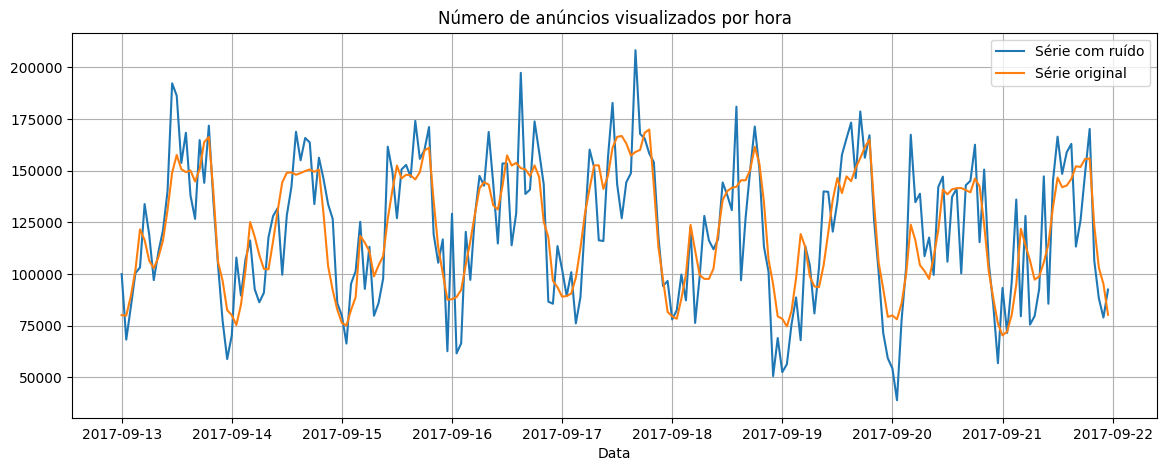

In [24]:
# Série de anúncios visualizados por hora
anuncio_ruido = ads.Ads
# Ruído branco com desvio padrão 20.000
ruido = np.random.normal(loc=1.0, scale=20000.0, size=(anuncio_ruido.shape))
# Adiciona ruído à serie de anúncios visualizados por hora
anuncio_ruido = anuncio_ruido + ruido 

plt.figure(figsize=(14, 5))
plt.plot(anuncio_ruido, label='Série com ruído')
plt.plot(ads.Ads, label='Série original')
plt.title('Número de anúncios visualizados por hora')
plt.xlabel('Data')
plt.legend()
plt.grid(True)
plt.show()

### Ruído colorido

Um ruído colorido é definido como sendo uma variável aleatória, mas cuja correlação com seus valores passados não é igual a zero.


Pode-se definir um ruído branco como sendo a resposta de um sistema dinâmico linear para uma entrada na forma de um ruído branco.

Um exemplo de sistema dinâmico é um filtro passa baixa de 1a ordem.

A equação de diferenças que implementa um filtro passa baixa de tempo discreto é dada por:

$$x_t = a x_{t-1} + b u_{t-1}$$

onde $x_t$ é a saída do filtro no instante de tempo $t$, $u_{t-1}$ é a entrada do filtro no instante de tempo $t-1$ e $a$ e $b$ são coeficientes constantes. 

Dessa forma, se a entrada for um ruído branco, então, $x_t$ é um ruído colorido. 

Adotando $b=1$, essa expressão calcula o novo valor valor da série como sendo igual ao anterior somado ao valor do ruído branco desse instante, ou seja:

$$x_t = a x_{t-1} + e_{t-1}$$

onde $e_t$ é o ruído branco. 

O código abaixo gera e mostra um ruído branco ($a = 0$) e algumas outras séries para alguns valores de $a$.

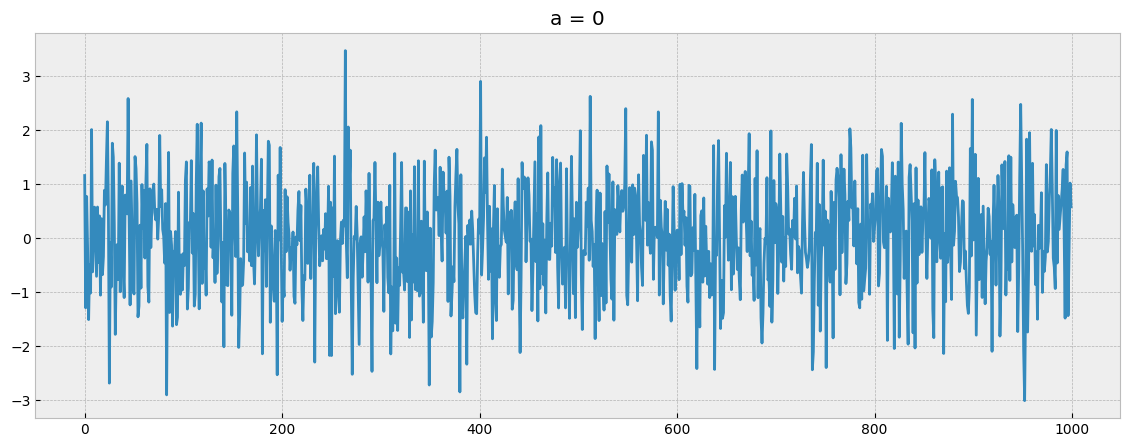

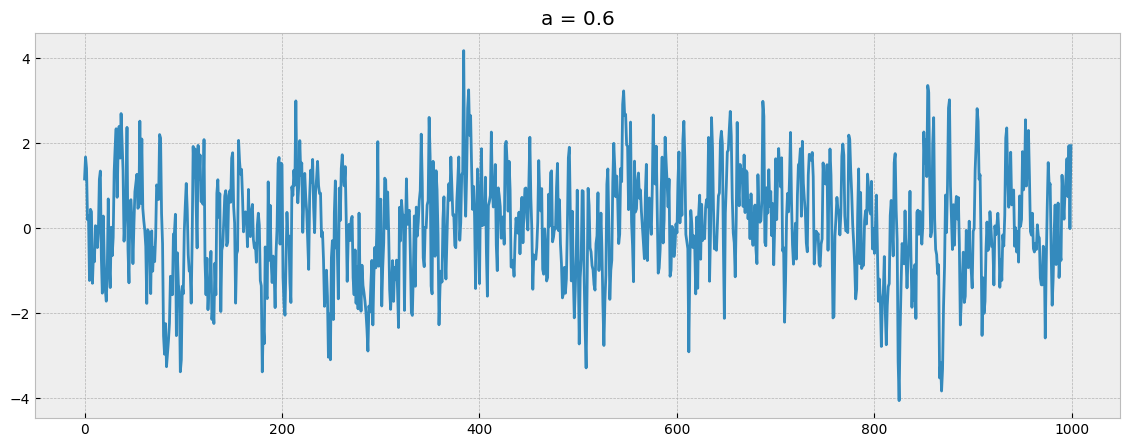

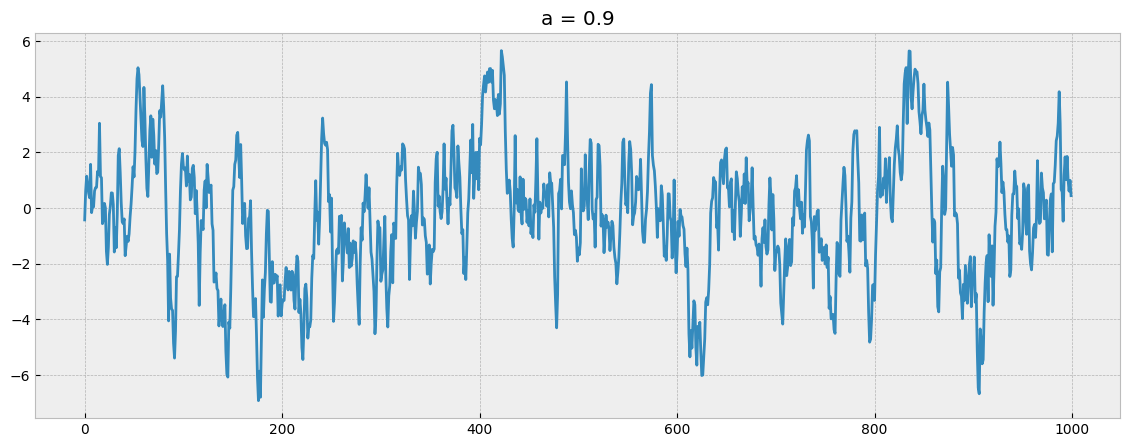

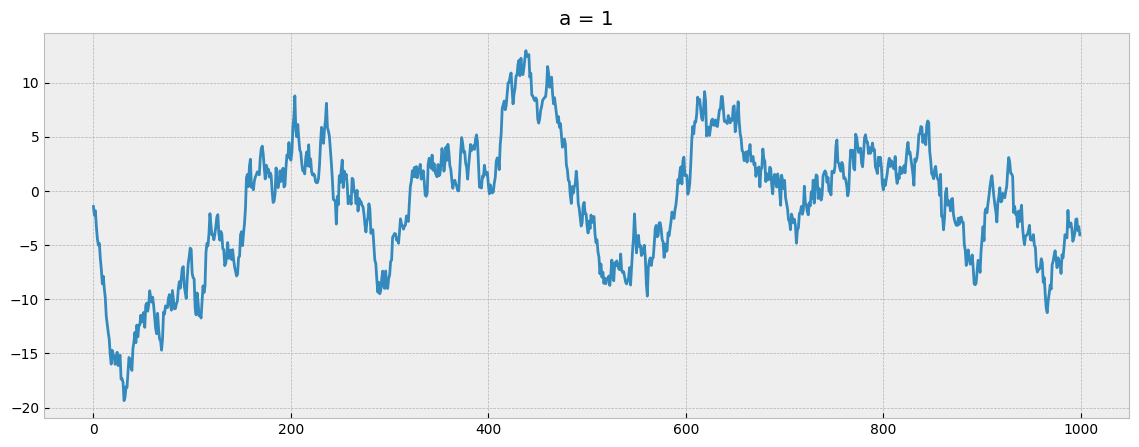

In [26]:
def plotProcesso(n_samples=1000, a=0):
    x = w = np.random.normal(size=n_samples)
    for t in range(n_samples):
        x[t] = a * x[t-1] + w[t]
    with plt.style.context('bmh'):  
        plt.figure(figsize=(14, 5))
        plt.plot(x)
        plt.title(f'a = {a}')
    return x
        
for a in [0, 0.6, 0.9, 1]:
    x = plotProcesso(a=a)

No primeiro gráfico, pode-se ver o ruído branco estacionário. No segundo gráfico com $a = 0,6$, aparecem ciclos de maior período, mas ainda parece ser uma série estacionária. O terceiro gráfico, para $a = 0,9$, apresenta um desvio da média, mas ainda oscila em relação a um valor médio. Finalmente, para $a = 1$, tem-se um processo de caminhada aleatória ("random walk"), ou seja, uma série temporal não estacionária.

## 4. Exemplo

Muitas séries temporais possuem tendência, ciclos, sazonalidades e ruído $\rightarrow$  quando se analisa uma série temporal, é importante identificar os padrões presentes nos dados e escolher um método capaz de capturar os padrões adequadamente.

Como exemplo real de uma série temporal vamos vizualizar o conjunto de dados "The weather dataset" (https://www.bgc-jena.mpg.de/wetter/), criado pelo Max Planck Institute for Biogeochemistry.

Esse conjunto de dados contém 14 características, tais como temperatura do ar, pressão atmosférica e umidade. Os dados são coletados a cada 10 minutos, iniciando em 2003. Por conveniência são usados somente os dados coletados entre 2009 e 2016, que foram preparados por François Chollet para seu livro "Deep Learning with Python".

Esses dados podem ser carregados diretamente do TensorFlow/Keras.

In [27]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13568290/13568290 [==============================] - 1s 0us/step


Os dados estão em um arquivo tipo CSV, então vamos carregá-lo em um dataframe pandas.

In [28]:
# carrega dados em uma dataframe pandas
df = pd.read_csv(csv_path)
print('Dimensão dos dados:', df.shape)
df.head()

Dimensão dos dados: (420551, 15)


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


A série é muito longa, pois originalmente os dados são amostrados a cada 10 minitos. Porém, como somente estamos mostrando exemplos de séries, utilizaremos os dados amostrados a cada hora, portanto, devemos realizar uma subamostragem dos dados de intervalos de 10 minutos para 1 hora. Além disso, vamos separar a coluna de data-hora.

In [29]:
# Seleciona 1 dado a cada 6 (de 10 minutos [original], para 1 hora)
df = df[5::6]
# Separa coluna da data-hora
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


Gráficos da temperatura em função do tempo.


Série completa da temperatura


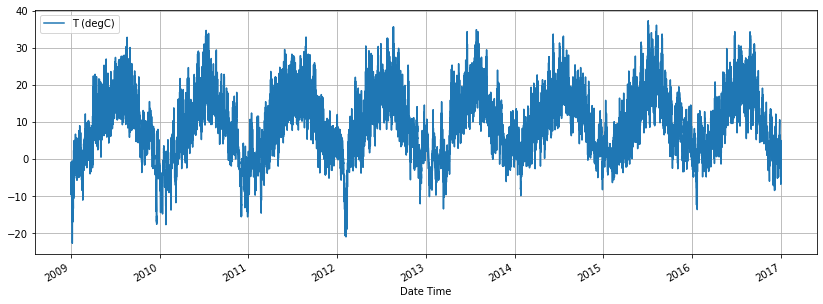

In [ ]:
print('\nSérie completa da temperatura')
plot_cols = ['T (degC)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True, figsize = (14,5))
plt.grid(True)

- Desse gráfico é possível observar a sazonalidade anual da série e a presença de ruído.

#### Temperatura no mês de janeiro de 2009


Temperatura em 20 dias de janeiro de 2009


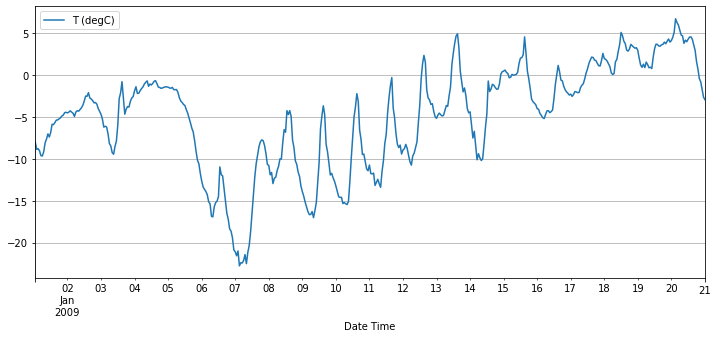

In [ ]:
print('\nTemperatura em 20 dias de janeiro de 2009')
plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True, figsize = (12,5))
plt.grid(True)

- Pode-se observar alguns ciclos que ocorrem durante o mês.

- Pode-se observar a sazonalidade diária dos dados.

- Pode-se também observar a tendência de elevação da temperatura entre os dias 07 e 20.

#### Temperatura em dois dias de janeiro de 2009


Temperatura em 2 dias consecutivos


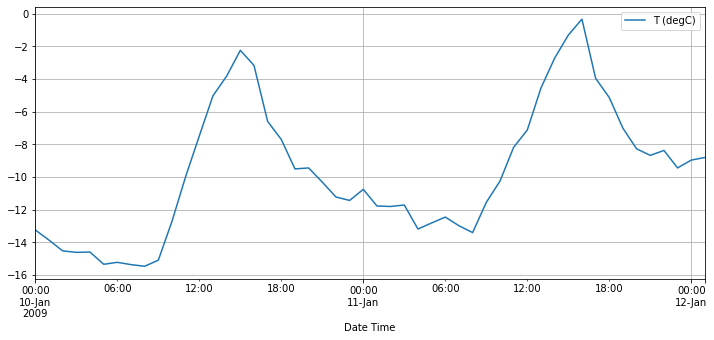

In [ ]:
print('\nTemperatura em 2 dias consecutivos')
plot_features = df[plot_cols][215:265]
plot_features.index = date_time[215:265]
_ = plot_features.plot(subplots=True, figsize = (12,5))
plt.grid(True)

- Desse gráfico pode-se observar a sazonalidade diária da temperatura.

## 5. Autocorrelação

A autocorrelação de uma série temporal mede a relaçao que existe entre amostras da série adquiridas em diferentes instantes de tempo. 

A autocorrelação permite determinar a duração de ciclos e sazonalidades de forma relativamente simples.

Define-se os coeficientes da autocorrelação para cada atraso na série. Por exemplo, $r_1$ mede a relação entre $y(kT_a)$ e $y(kT_a - T_a)$, $r_2$ mede a relação entre $y(kT_a)$ e $y(kT_a - 2T_a)$. 

Genericamente, o coeficiente $r_i$ é dado por:

$$r_i = \frac {\sum_{k=i+1}^{N} (y_k - \bar y)(y_{k-i} - \bar y)} {\sum_{k=1}^{N}(y_k - \bar y)^2}$$

onde $\bar y$ é o valor médio da série e $N$ é o número total de amostras da série, ou seja, $NT_a$ é tempo total da série, ou o tempo da janela da série sendo analisada.

### Interpretação dos valores dos coeficientes da autocorrelação:

- $r_i = 0 \to$ significa que os dados nos instantes de tempo $KT_a$ e $(kT_a - iT_a)$ são bem diferentes


- $r_i>0 \to$ significa que a série se repete a cada $iT_a$ intervalo de tempo


- $r_i<0 \to$ significa que a série se repete com sinal negativo a cada $iT_a$ intervalo de tempo


O código abaixo calcula a autocorrelação de uma série usando a função `correlate` da biblioteca numpy.

In [31]:
# Função para cálculo da autocorrelação de uma série
def autocorr(x):
    x = x - np.mean(x)
    result = np.correlate(x, x, mode='full')
    maxcorr = np.argmax(result)
    acorr = result / result[maxcorr] # normaliza a autocorrelação
    n2 = int(np.round(len(acorr)/2))
    return acorr[n2:]

### 5.1 Exemplo #1 - Autocorrelação de um ruído branco

Como vimos, um ruído branco é uma série que não apresenta nenhuma correlação com valores anteriores.

Vamos calcular a autocorrelação de um ruído branco para verificar se de fato isso é verdade.

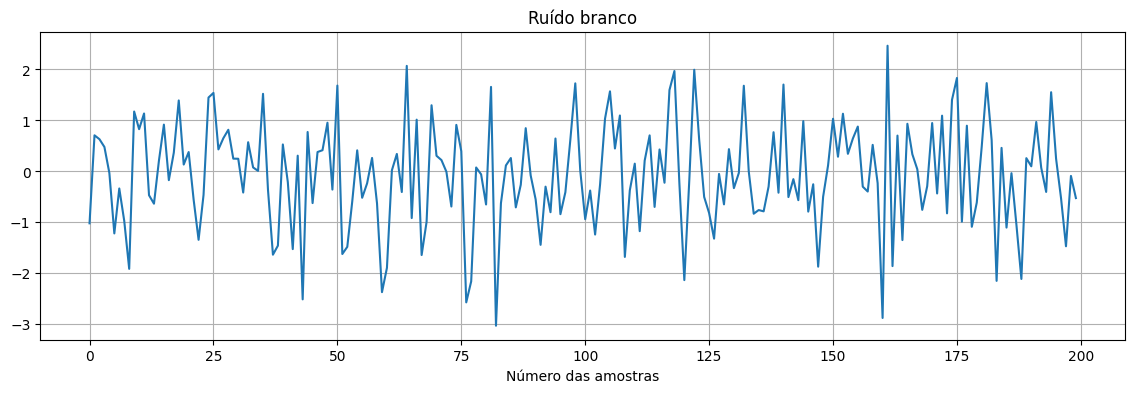

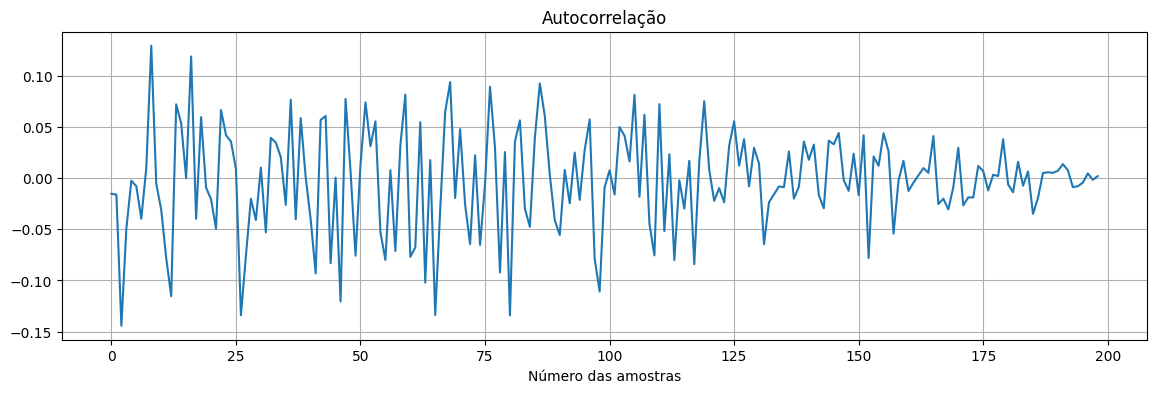

In [37]:
# Gera ruído branco
r = np.random.normal(loc=0.0, scale=1.0, size=(200,))
# Calcula autocorrelação
Rr = autocorr(r)
plt.figure(figsize=(14, 4))
plt.plot(r)
plt.title('Ruído branco')
plt.xlabel('Número das amostras')
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 4))
plt.title('Autocorrelação')
plt.plot(Rr)
plt.xlabel('Número das amostras')
plt.grid(True)
plt.show()

Era esperado que para um ruído branco todos os coeficientes da autocorrelação fossem iguais a zero.

Do gráfico da autocorrelação observa-se que os coeficientes da autocorrelação não são exatamente iguais a zero, mas perto de zero. 

Na prática, para um ruído branco espera-se que 95% dos picos estejam dentro do intervalo $±2/ \sqrt{N}$, onde $N$ é o número de amostras da série. Se mais do que 5% dos picos estiverem fora desse intervalo, então, a série não é um ruído branco.

No caso dessa série temos $N=200$, então, $±2/ \sqrt{200} = 0,14$  $\rightarrow$ do gráfico da autocorrelação pode-se ver que somente poucos picos estão fora desse intervalo, confirmando que essa série é um ruído branco.

### 5.2 Exemplo #2 - Autocorrelação de uma série periódica

Para facilitar o entendimento da autocorrelação vamos calcular a autocorrelação de uma série períodica com duas componentes de frequência: $\pi$ rad/s e $3\pi$ rad/s. Essas componentes de frequência possuem períodos de 2 e 2/3 segundos respectivamente.

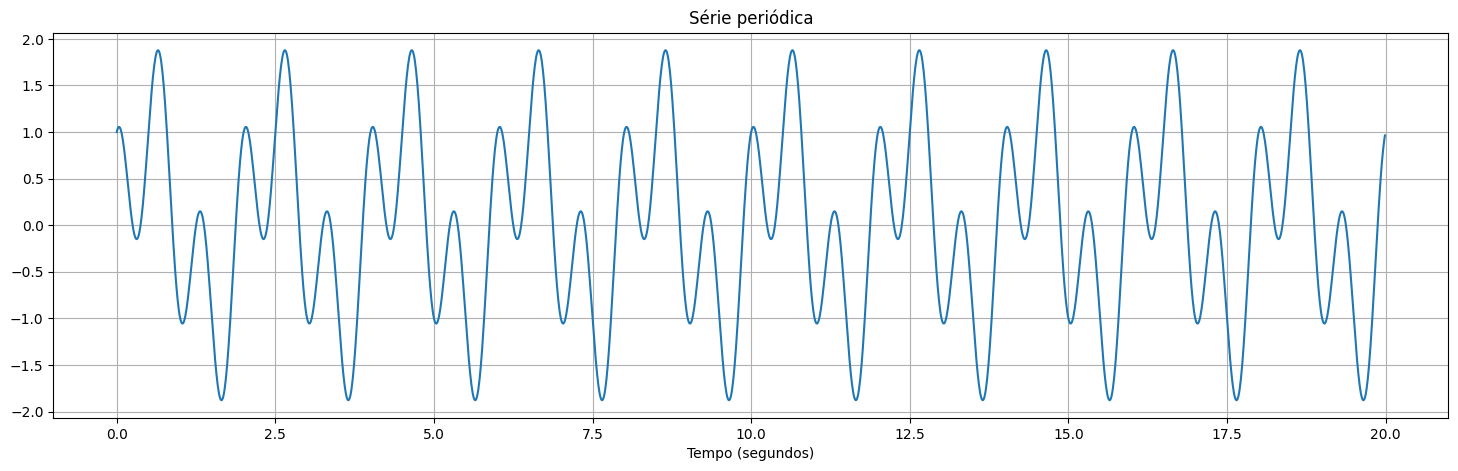

In [38]:
# Período de amostragem
Ta = 0.01
# Vetor de tempo 
t = np.arange(0.0, 20.0, Ta)
# Série periódica
y = np.sin(pi*t) + np.cos(3*pi*t)

plt.figure(figsize=(18, 5))
plt.plot(t, y)
plt.title('Série periódica')
plt.xlabel('Tempo (segundos)')
plt.grid(True)
plt.show()

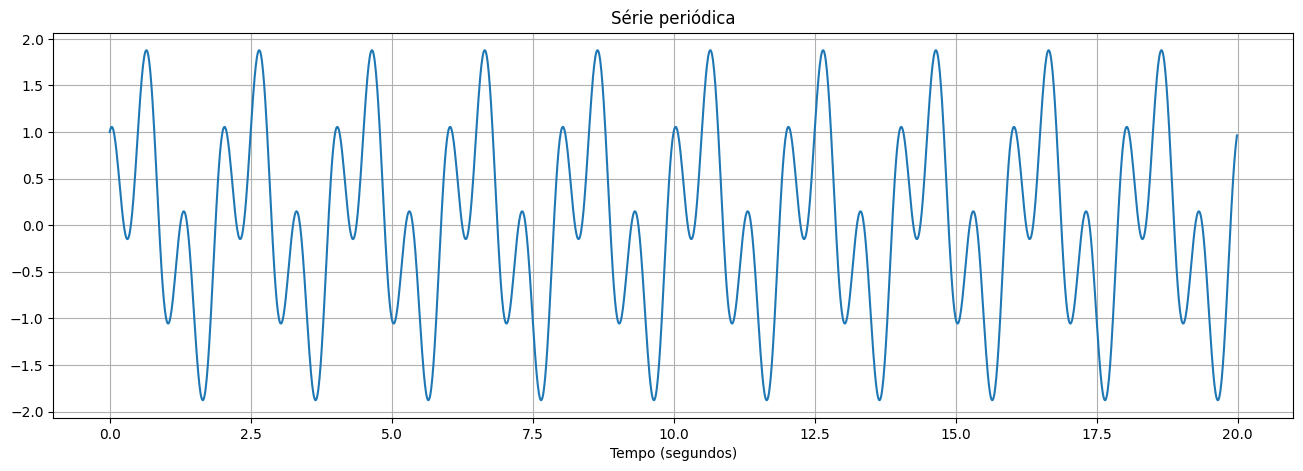

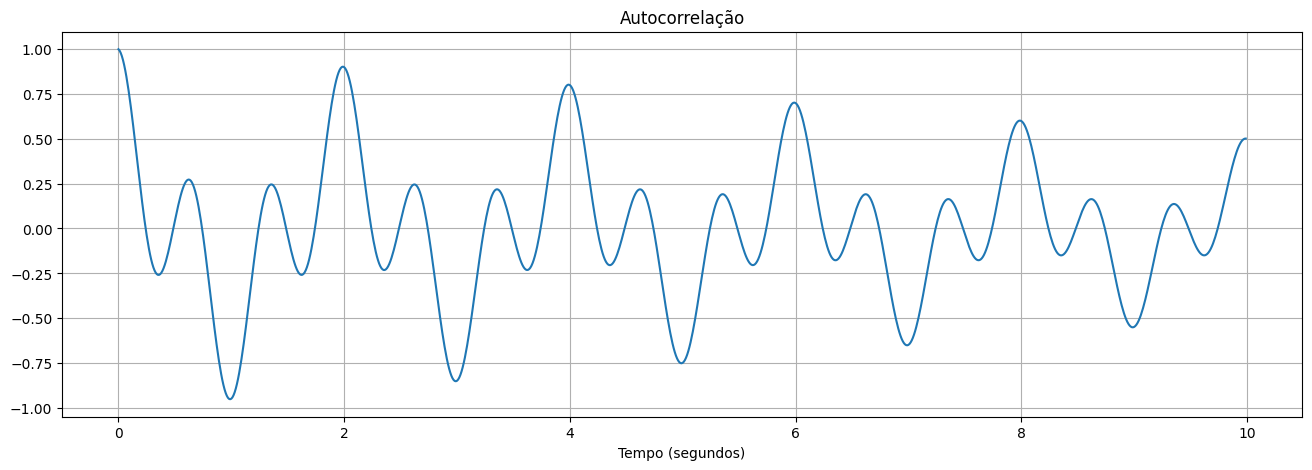

In [41]:
# Calcula autocorrelação
Ry = autocorr(y)

plt.figure(figsize=(16, 5))
plt.plot(t, y)
plt.title('Série periódica')
plt.xlabel('Tempo (segundos)')
plt.grid(True)
plt.show()
plt.figure(figsize=(16, 5))
plt.title('Autocorrelação')
plt.plot(t[:1000], Ry[:1000])
plt.xlabel('Tempo (segundos)')
plt.grid(True)
plt.show()

- Observam-se picos positivos maiores na autocorrelação a cada 2 segundos e picos negativos maiores a cada segundo, porque?


### 5.3 Exemplo #3 - Autocorrelação de uma série com sazonalidade

Vamos calcular a autocorrelação da série de receita de vendas de jogos de vídeo game (currency).

In [42]:
currency.head()

,GEMS_GEMS_SPENT,tendencia
Time,,
2017-05-01,1199436,1.004436e+06
2017-05-02,1045515,1.004671e+06
2017-05-03,586111,1.004927e+06
2017-05-04,856601,1.005204e+06
2017-05-05,793775,1.005501e+06


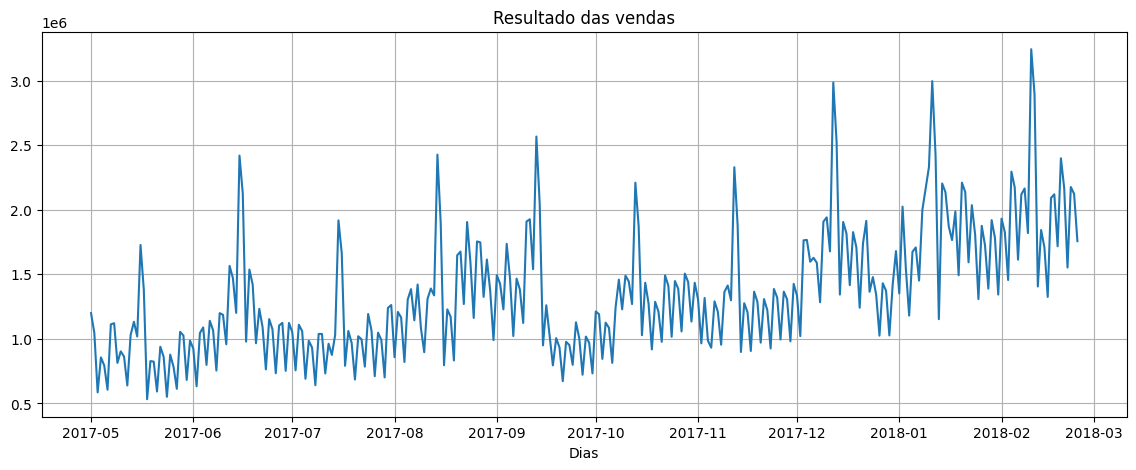

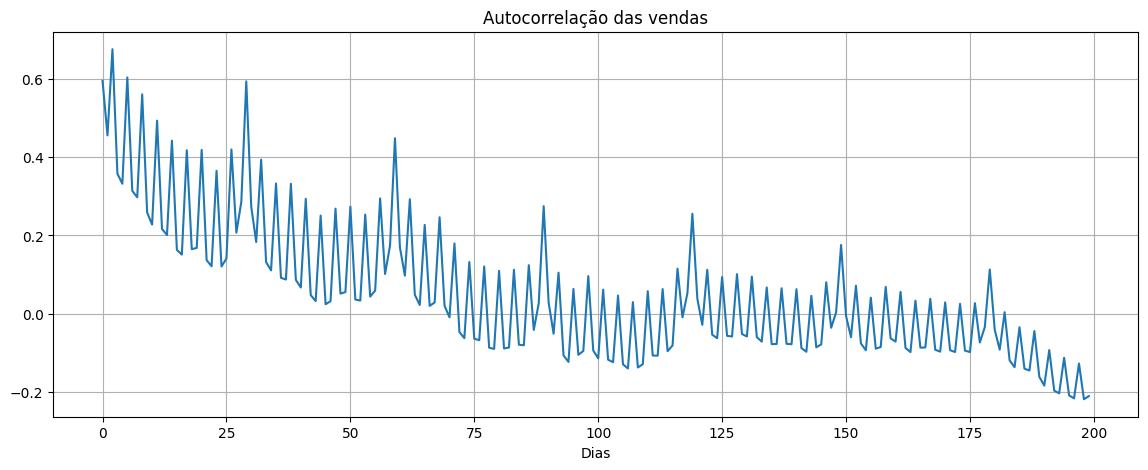

In [45]:
# Retira eixo desnecessário
x = np.squeeze(currency['GEMS_GEMS_SPENT'])
# Calcula autocorrelação
R = autocorr(x)

plt.figure(figsize=(14, 5))
plt.plot(x)
plt.title('Resultado das vendas')
plt.xlabel('Dias')
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 5))
plt.title('Autocorrelação das vendas')
plt.plot(R[:200])
plt.xlabel('Dias')
plt.grid(True)
plt.show()

- Observa-se que a sazonalidade da série, de aproximadamente 30 dias, aparece no gráfico da autocorrelação na forma de picos positivos "grandes" espaçados em intervalos de aproximadamente 30 dias.


- Observa-se que esses picos positivos maiores se repetem em múltiplos de 30 dias em razão da repetição do mesmo padrão de sazonalidade. 

### 5.4 Exemplo #4 - Autocorrelação de uma série com tendência

Uma série que apresenta tendência é a variação de temperatura no mês de janeiro de 2009. Assim, vamos obter uma série com tendência de crescimento usando algumas amostras da temperatura do conjunto de dados (https://www.bgc-jena.mpg.de/wetter/) criado pelo Max Planck Institute for Biogeochemistry do mês de janeiro de 2009.

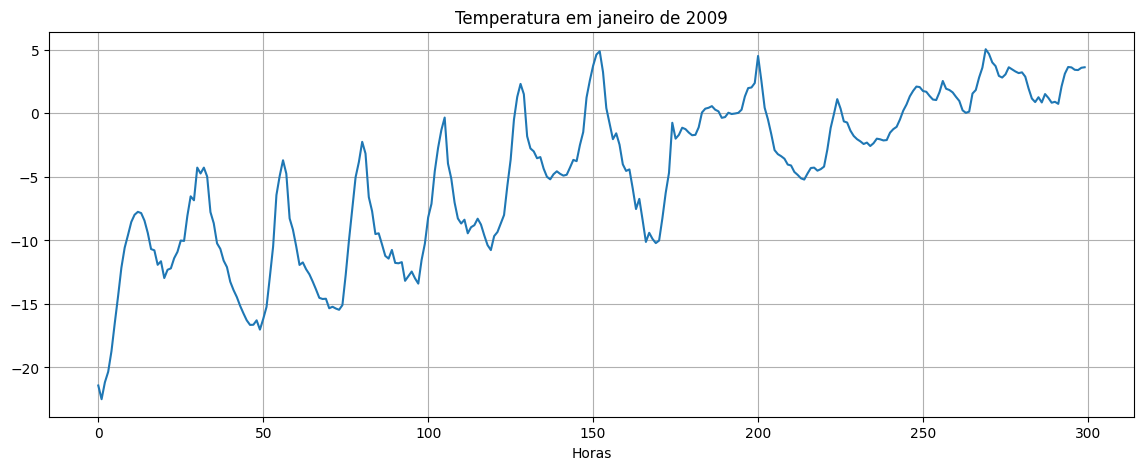

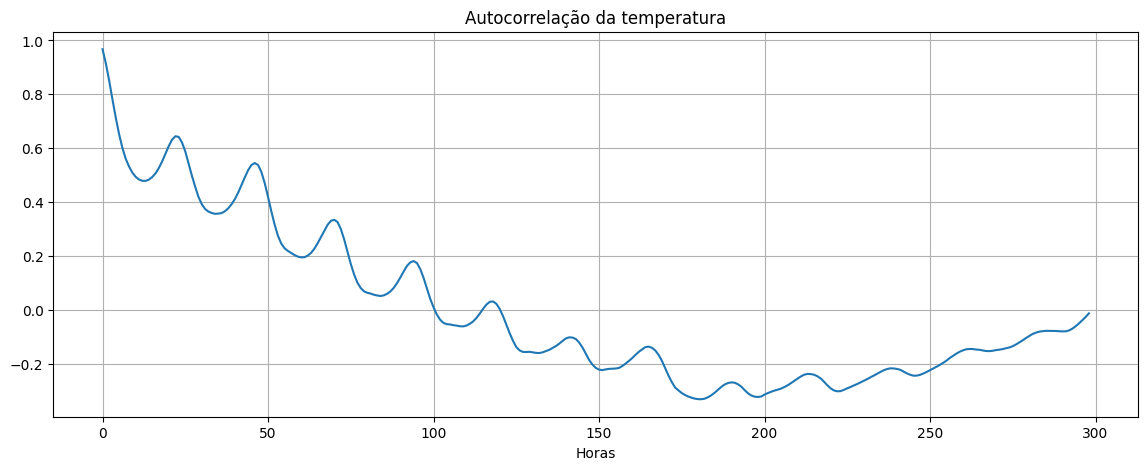

In [46]:
# Série crescente de temperatura
x = np.array(df['T (degC)'])
x = x[150:450]

# Calcula autocorrelação
Rt = autocorr(x)

plt.figure(figsize=(14, 5))
plt.plot(x)
plt.title('Temperatura em janeiro de 2009')
plt.xlabel('Horas')
plt.grid(True)
plt.show()
plt.figure(figsize=(14, 5))
plt.title('Autocorrelação da temperatura')
plt.plot(Rt)
plt.xlabel('Horas')
plt.grid(True)
plt.show()


- Observa-se que a autocorelação inicia com valor próximo a 1 e vai decrescendo $\rightarrow$ isso é típico de séries com tendências.


- Esse mesmo comportamente pode ser visto na autocorrelação da série de receita de vendas de video games que decresce de forma suave.


- Também é possível observar os picos espaçados de 24 horas, que representam a sazonaliddae diária de temperatura, ou seja,  correlação entre a variação de temperatura ao longo dos dias, que para cada dia varia de forma semelhante ao dos outros dias.

